# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

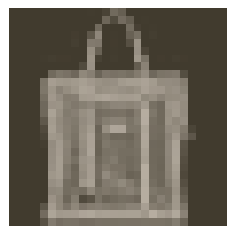

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
# TODO: Define your network architecture here
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [5]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss() #손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.01) #최적화 함수

In [6]:
# TODO: Train the network here

# PyTorch의 일반적인 Deep Learning 프로세스
#1. 네트워크를 forawd해서 로짓을 얻는다.
#2. 로짓을 사용해 손실을 구한다.
#3. backward()함수를 사용해 backward를 진행해 그라디언트를 계산한다.
#4. 최적화 함수로 가중치를 업데이트 한다.

epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader): #배치별로 가져온다.
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad() #초기화
        
        # Forward and backward passes
        output = model.forward(images) #forward
        loss = criterion(output, labels) 
        loss.backward() #backward
        optimizer.step() #update
        
        running_loss += loss.item() #손실을 축적한다.
        
        if steps % print_every == 0: #40번 때 마다 출력
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0
            #40번 마다 누적된 손실의 평균을 출력하고, 0으로 초기화

Epoch: 1/3...  Loss: 2.3018
Epoch: 1/3...  Loss: 2.3000
Epoch: 1/3...  Loss: 2.2988
Epoch: 1/3...  Loss: 2.2972
Epoch: 1/3...  Loss: 2.2957
Epoch: 1/3...  Loss: 2.2940
Epoch: 1/3...  Loss: 2.2927
Epoch: 1/3...  Loss: 2.2905
Epoch: 1/3...  Loss: 2.2887
Epoch: 1/3...  Loss: 2.2852
Epoch: 1/3...  Loss: 2.2831
Epoch: 1/3...  Loss: 2.2811
Epoch: 1/3...  Loss: 2.2754
Epoch: 1/3...  Loss: 2.2718
Epoch: 1/3...  Loss: 2.2666
Epoch: 1/3...  Loss: 2.2593
Epoch: 1/3...  Loss: 2.2533
Epoch: 1/3...  Loss: 2.2433
Epoch: 1/3...  Loss: 2.2302
Epoch: 1/3...  Loss: 2.2125
Epoch: 1/3...  Loss: 2.1958
Epoch: 1/3...  Loss: 2.1813
Epoch: 1/3...  Loss: 2.1685
Epoch: 2/3...  Loss: 1.1825
Epoch: 2/3...  Loss: 2.1486
Epoch: 2/3...  Loss: 2.1275
Epoch: 2/3...  Loss: 2.1001
Epoch: 2/3...  Loss: 2.0849
Epoch: 2/3...  Loss: 2.0899
Epoch: 2/3...  Loss: 2.0747
Epoch: 2/3...  Loss: 2.0669
Epoch: 2/3...  Loss: 2.0636
Epoch: 2/3...  Loss: 2.0641
Epoch: 2/3...  Loss: 2.0473
Epoch: 2/3...  Loss: 2.0310
Epoch: 2/3...  Loss:

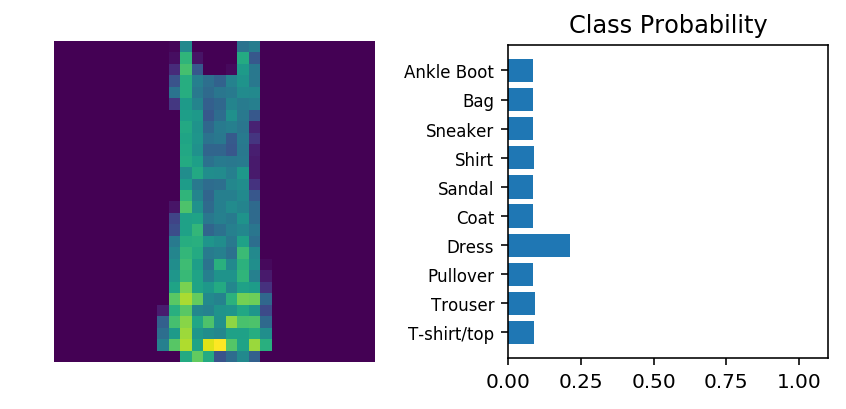

In [11]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(img)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.